In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jsphyg/weather-dataset-rattle-package")

print("Path to dataset files:", path)

C:\Users\ibrah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.83M/3.83M [00:01<00:00, 2.47MB/s]

Extracting files...
Path to dataset files: C:\Users\ibrah\.cache\kagglehub\datasets\jsphyg\weather-dataset-rattle-package\versions\2


In [2]:
! pip install kagglehub

     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/68.3 kB ? eta -:--:--
   ---------------------------------------- 68.3/68.3 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/158.8 kB ? eta -:--:--
   -------------------------------------- - 153.6/158.8 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 158.8/158.8 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.7 kB ? eta -:--:--
   ---------------------------------------- 64.7/64.7 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/161.2 kB ? eta -:--:--
   ---------------------------------------- 161.2/161.2 kB 4.7 MB/s eta 0:00:00
   -------------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.mixture import GaussianMixture # for GMM clustering
from sklearn import metrics # for calculating Silhouette score

import matplotlib.pyplot as plt # for data visualization
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

from geopy.geocoders import Nominatim # for getting city coordinates
from progressbar import ProgressBar # for displaying progress 
import time # for adding time delays

In [12]:
!pip install progressbar

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12163 sha256=b95addbf8974b5a69ee5b8d313c24327917de4c629f5869aa607075594f04041
  Stored in directory: c:\users\ibrah\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\8d\bb\b2\5353b966ac6f3c5e1000629a9a5f6aed41794487f551e32efc
Successfully built progressbar



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
from pathlib import Path
import pandas as pd

# Show more columns
pd.set_option("display.max_columns", 50)

# Point to your KaggleHub cache (works cross-platform)
kaggle_dir = Path.home() / ".cache" / "kagglehub" / "datasets" / "jsphyg" / "weather-dataset-rattle-package" / "versions" / "2"

# Find the CSV even if the name or subfolder changes slightly
candidates = list(kaggle_dir.rglob("weatherAUS.csv"))
if not candidates:
    raise FileNotFoundError(f"Could not find weatherAUS.csv under: {kaggle_dir}")
csv_path = candidates[0]

df = pd.read_csv(csv_path, encoding="utf-8")
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [16]:
!pip install geopy plotly scikit-learn tqdm --quiet



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
# --- Prep: create Location2 if missing ---
import pandas as pd
from pathlib import Path

if "Location2" not in df.columns:
    assert "Location" in df.columns, "df['Location'] not found (load your weather CSV first)."
    # Insert spaces before capitals (no change at string start), tidy whitespace
    df["Location2"] = (
        df["Location"].astype(str)
        .str.replace(r"(?<!^)(?=[A-Z])", " ", regex=True)
        .str.replace(r"\s+", " ", regex=True)
        .str.strip()
    )
    # Special-case for geocoder
    df.loc[df["Location2"].eq("Pearce RAAF"), "Location2"] = "Pearce, Bullsbrook"

print("Sample Location → Location2:")
print(df[["Location", "Location2"]].head(8))

# --- Geocode with cache and polite rate limiting ---
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm

country = "Australia"
cache_path = Path("geo_cache.csv")
user_agent = "gmm-aus-cities/1.0 (contact: your_email@example.com)"  # put a real email

# Load cache (includes status so we don't keep retrying bad rows)
if cache_path.exists():
    df_cache = pd.read_csv(cache_path)
else:
    df_cache = pd.DataFrame(columns=["Loc", "Latitude", "Longitude", "Status", "Message"])

# Normalize types
for col, dtype in {"Loc":"string","Latitude":"float64","Longitude":"float64","Status":"string","Message":"string"}.items():
    if col not in df_cache.columns: df_cache[col] = pd.Series(dtype=dtype)
df_cache = df_cache.astype({"Loc":"string","Latitude":"float64","Longitude":"float64","Status":"string","Message":"string"}).fillna({"Status":"","Message":""})

# Cities to query = unique locations not already OK in cache
cities = pd.Series(df["Location2"].astype(str).unique(), name="Loc")
have_ok = set(df_cache.loc[df_cache["Status"].eq("OK"), "Loc"])
to_query = [c for c in cities if c not in have_ok]

geolocator = Nominatim(user_agent=user_agent, timeout=5)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

rows = []
for city in tqdm(to_query, desc="Geocoding cities"):
    try:
        loc = geocode(f"{city}, {country}")
        if loc is not None:
            rows.append((city, loc.latitude, loc.longitude, "OK", ""))
        else:
            rows.append((city, None, None, "NOT_FOUND", "No result"))
    except Exception as e:
        rows.append((city, None, None, "ERROR", str(e)))

if rows:
    df_new = pd.DataFrame(rows, columns=["Loc","Latitude","Longitude","Status","Message"])
    df_cache = pd.concat([df_cache, df_new], ignore_index=True)
    df_cache.drop_duplicates(subset=["Loc"], keep="first", inplace=True)
    df_cache.to_csv(cache_path, index=False)

# Final table of successful geocodes
df_loc = df_cache[df_cache["Status"].eq("OK")][["Loc","Latitude","Longitude"]].reset_index(drop=True)
print(f"Geocoded OK: {len(df_loc)} / {len(cities)}  |  Failed cached: {len(df_cache) - len(df_loc)}")
df_loc.head()


Sample Location → Location2:
  Location Location2
0   Albury    Albury
1   Albury    Albury
2   Albury    Albury
3   Albury    Albury
4   Albury    Albury
5   Albury    Albury
6   Albury    Albury
7   Albury    Albury


Geocoding cities: 100%|██████████| 49/49 [00:50<00:00,  1.03s/it]

Geocoded OK: 48 / 49  |  Failed cached: 1


,Loc,Latitude,Longitude
0,Albury,-36.073773,146.913526
1,Badgerys Creek,-33.883145,150.742466
2,Cobar,-31.966663,145.304505
3,Coffs Harbour,-30.298600,153.109412
4,Moree,-29.461720,149.840715


In [22]:
%pip install -U nbformat plotly
import plotly.io as pio
pio.renderers.default = "notebook_connected"  # or "jupyterlab"


   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/90.0 kB ? eta -:--:--
   ---------------------------------------- 90.0/90.0 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/63.8 kB ? eta -:--:--
   ---------------------------------------- 63.8/63.8 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/228.6 kB ? eta -:--:--
   ----------------- ---------------------- 102.4/228.6 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 228.6/228.6 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


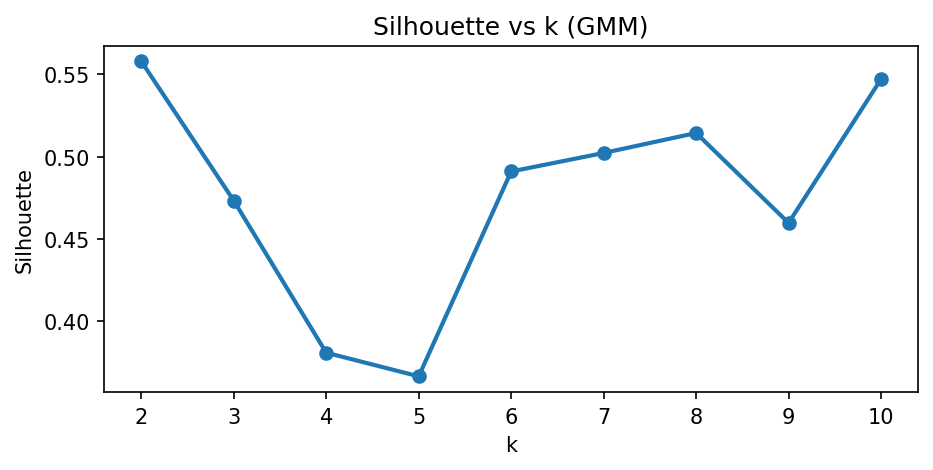

2

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# features
X = df_loc[["Latitude","Longitude"]].to_numpy()

# standardize for Euclidean-based silhouette
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

K = range(2, 11)
scores = []
for k in K:
    gm = GaussianMixture(n_components=k, covariance_type="full",
                         n_init=20, init_params="kmeans", random_state=1)
    labels = gm.fit_predict(X_std)
    scores.append(silhouette_score(X_std, labels))

plt.figure(figsize=(7,3), dpi=150)
plt.plot(list(K), scores, "o-", lw=2)
plt.xlabel("k"); plt.ylabel("Silhouette"); plt.title("Silhouette vs k (GMM)")
plt.show()

best_k = int(K[int(np.argmax(scores))])
best_k


In [25]:
from sklearn.mixture import GaussianMixture
import plotly.graph_objects as go

gmm = GaussianMixture(n_components=best_k, covariance_type="full",
                      n_init=20, init_params="kmeans", max_iter=200,
                      random_state=1).fit(X_std)
labels = gmm.predict(X_std)
df_loc["Cluster"] = labels

print("Converged:", gmm.converged_, "| Iterations:", gmm.n_iter_)

fig = go.Figure(go.Scattergeo(
    lat=df_loc["Latitude"], lon=df_loc["Longitude"],
    text=[f"{c} (cluster {k})" for c,k in zip(df_loc["Loc"], df_loc["Cluster"])],
    mode="markers",
    marker=dict(size=7, color=df_loc["Cluster"], colorscale="Viridis",
                showscale=True, colorbar=dict(title="Cluster"))
))
fig.update_layout(
    width=1000, height=760, margin=dict(r=0,t=30,l=0,b=10),
    geo=dict(scope="world", projection_type="miller", landcolor="rgb(250,250,250)",
             center=dict(lat=-25.69839, lon=139.8813), projection_scale=6),
    title=f"GMM clusters of Australian cities (k={best_k})"
)
fig.show()


Converged: True | Iterations: 2


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [26]:
import plotly.io as pio
pio.renderers.default = "browser"   # set once per session
fig.show()


In [27]:
# samples in standardized space -> back to lat/lon
Z_std, comp = gmm.sample(10_000)
Z = scaler.inverse_transform(Z_std)

import plotly.graph_objects as go
samples_fig = go.Figure(go.Scattergeo(
    lat=Z[:,0], lon=Z[:,1], mode="markers",
    marker=dict(size=3, color=comp, colorscale="Viridis", showscale=True,
                colorbar=dict(title="Component"))
))
samples_fig.update_layout(
    width=1000, height=760, margin=dict(r=0,t=30,l=0,b=10),
    geo=dict(scope="world", projection_type="miller", landcolor="rgb(250,250,250)",
             center=dict(lat=-25.69839, lon=139.8813), projection_scale=6),
    title=f"GMM samples ({len(Z)} points)"
)
samples_fig.show()
